In [82]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
from scipy import stats

In [83]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [84]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [85]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [86]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0eb8a9a36f66204a6c181b6165f05eed


In [87]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | umm kaddadah
Processing Record 3 of Set 1 | yingcheng
Processing Record 4 of Set 1 | la ronge
Processing Record 5 of Set 1 | bayanday
Processing Record 6 of Set 1 | ust-kulom
Processing Record 7 of Set 1 | orocue
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | inuvik
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | isangel
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | honiara
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | oriximina
Processing Record 19 of Set 1 | sherlovaya gora
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | artyk
City not found. Skipping...
Processing Record 2

Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | sabang
Processing Record 42 of Set 4 | nikolskoye
Processing Record 43 of Set 4 | hithadhoo
Processing Record 44 of Set 4 | havoysund
Processing Record 45 of Set 4 | puerto escondido
Processing Record 46 of Set 4 | thano bula khan
City not found. Skipping...
Processing Record 47 of Set 4 | muhos
Processing Record 48 of Set 4 | komotini
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | lompoc
Processing Record 1 of Set 5 | tikrit
Processing Record 2 of Set 5 | antofagasta
Processing Record 3 of Set 5 | asau
Processing Record 4 of Set 5 | rafsanjan
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | severo-kurilsk
Processing Record 7 of Set 5 | nouadhibou
Processing Record 8 of Set 5 | itaituba
Processing Record 9 of Set 5 | sedelnikovo
City not found. Skipping...
Processing Record 10 of Set 5 | balod
Processing Record 11 of Set 5 | karrat

Processing Record 31 of Set 8 | evans
Processing Record 32 of Set 8 | markdale
Processing Record 33 of Set 8 | mrirt
City not found. Skipping...
Processing Record 34 of Set 8 | tabuk
Processing Record 35 of Set 8 | sagua la grande
Processing Record 36 of Set 8 | labutta
City not found. Skipping...
Processing Record 37 of Set 8 | hobyo
Processing Record 38 of Set 8 | east london
Processing Record 39 of Set 8 | sagua de tanamo
Processing Record 40 of Set 8 | padang
Processing Record 41 of Set 8 | san marcos
Processing Record 42 of Set 8 | sicamous
Processing Record 43 of Set 8 | kysyl-syr
Processing Record 44 of Set 8 | grand-lahou
Processing Record 45 of Set 8 | tashtagol
Processing Record 46 of Set 8 | buala
Processing Record 47 of Set 8 | chuy
Processing Record 48 of Set 8 | terre haute
Processing Record 49 of Set 8 | cidreira
Processing Record 50 of Set 8 | lipno
Processing Record 1 of Set 9 | lavrentiya
Processing Record 2 of Set 9 | fort-shevchenko
Processing Record 3 of Set 9 | ho

Processing Record 21 of Set 12 | lawton
Processing Record 22 of Set 12 | roald
Processing Record 23 of Set 12 | mugumu
Processing Record 24 of Set 12 | ginda
Processing Record 25 of Set 12 | oxelosund
Processing Record 26 of Set 12 | garner
Processing Record 27 of Set 12 | malanje
Processing Record 28 of Set 12 | salalah
Processing Record 29 of Set 12 | doha
Processing Record 30 of Set 12 | zhigansk
Processing Record 31 of Set 12 | alekseyevka
Processing Record 32 of Set 12 | kaniama
Processing Record 33 of Set 12 | ceres
Processing Record 34 of Set 12 | yomitan
City not found. Skipping...
Processing Record 35 of Set 12 | mlowo
Processing Record 36 of Set 12 | barra
Processing Record 37 of Set 12 | gushikawa
Processing Record 38 of Set 12 | galesong
Processing Record 39 of Set 12 | conceicao do araguaia
Processing Record 40 of Set 12 | beisfjord
Processing Record 41 of Set 12 | wicklow
Processing Record 42 of Set 12 | ubinskoye
Processing Record 43 of Set 12 | grand centre
City not fou

In [88]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.79,-50.01,77.14,34,0,3.62,BR,2020-11-07 14:53:37
1,Umm Kaddadah,13.60,26.69,86.09,15,16,12.19,SD,2020-11-07 14:53:37
2,Yingcheng,30.95,113.55,55.40,93,0,5.19,CN,2020-11-07 14:53:38
3,La Ronge,55.10,-105.28,6.80,92,87,4.23,CA,2020-11-07 14:53:38
4,Bayanday,53.07,105.51,17.44,91,94,1.36,RU,2020-11-07 14:53:38
5,Ust-Kulom,61.69,53.69,31.87,98,95,5.41,RU,2020-11-07 14:53:38
6,Orocue,4.79,-71.34,86.45,63,3,6.98,CO,2020-11-07 14:53:38
7,Vaini,-21.20,-175.20,66.20,93,20,4.70,TO,2020-11-07 14:53:38
8,Longyearbyen,78.22,15.64,35.60,69,75,10.29,SJ,2020-11-07 14:53:39
9,Ushuaia,-54.80,-68.30,55.40,43,75,17.22,AR,2020-11-07 14:53:39


In [89]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [90]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [91]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604760909.638923

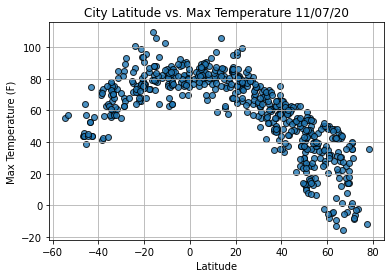

In [92]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

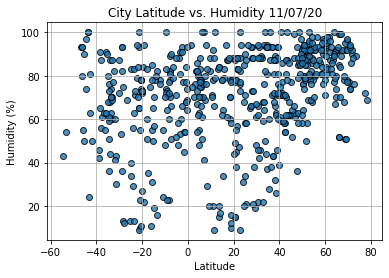

In [93]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

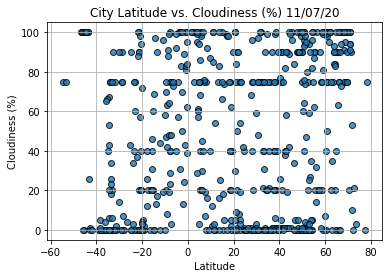

In [94]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

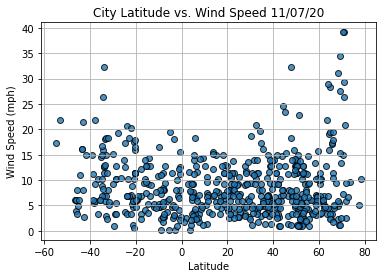

In [95]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [96]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [97]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Umm Kaddadah,13.60,26.69,86.09,15,16,12.19,SD,2020-11-07 14:53:37
2,Yingcheng,30.95,113.55,55.40,93,0,5.19,CN,2020-11-07 14:53:38
3,La Ronge,55.10,-105.28,6.80,92,87,4.23,CA,2020-11-07 14:53:38
4,Bayanday,53.07,105.51,17.44,91,94,1.36,RU,2020-11-07 14:53:38
5,Ust-Kulom,61.69,53.69,31.87,98,95,5.41,RU,2020-11-07 14:53:38


In [98]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

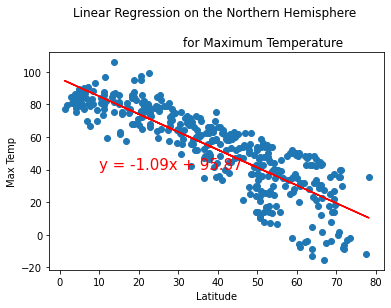

In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Maximum Temperature''', 'Max Temp',(10,40))

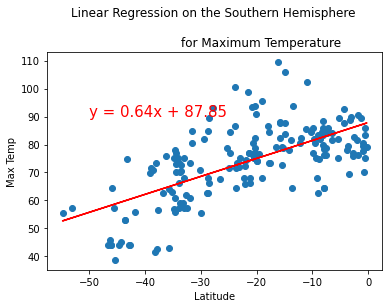

In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature''', 'Max Temp',(-50,90))

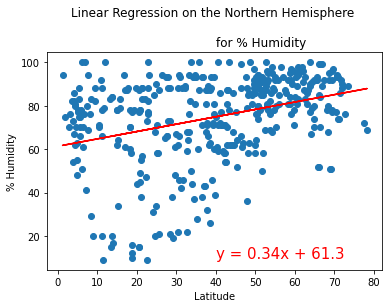

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for % Humidity''', '% Humidity',(40,10))

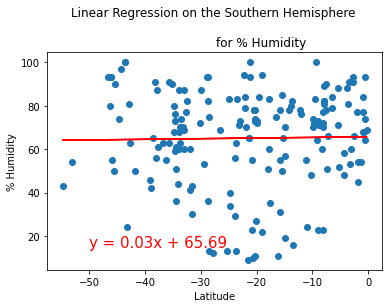

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Humidity''', '% Humidity',(-50,15))

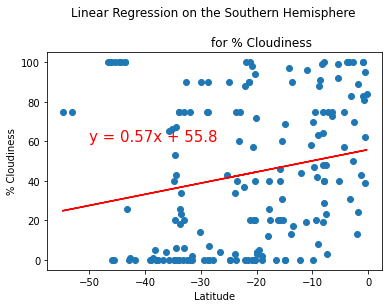

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(-50,60))

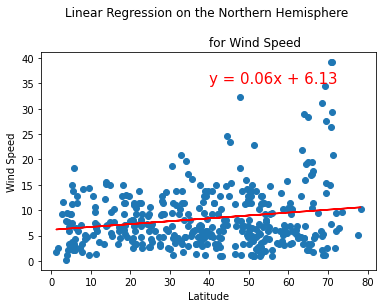

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(40,35))

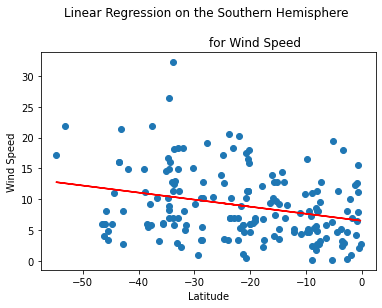

In [105]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(-50,35))
